# Navigate i ROS Action

Poruszanie się robotem to jego podstawowe zadanie

<img src="./images/nav.jpg" width="40%">


# Navigate

Navigate (nav2) to zestaw narzędzi pozwalających na poruszanie się robotem po pomieszczeniach. Narzędzia pozwalają tworzyć mapę, planować ruch, poruszać się po zmapowanym terenie czy nawet tworzyć skomplikowane zachowania

Nie jesteśmy w stanie zrobić wszystkiego, dlatego przygotowałem mapę (za pomocą [SLAM](https://emanual.robotis.com/docs/en/platform/turtlebot3/slam_simulation/)) po której może poruszać się robot.

Nawigacja składa się z paru części:

- lokalizacja: node'y zajmujące się obliczaniem gdzie robot jest. Wykorzystują do tego czujniki: **obrotu kół (odometria)**, potencjalnie IMU (akcelerometr i żyroskop) i czujnik laserowy, pozwalający określić punkty charakterystyczne występujące na mapie. 
- planowanie: node'y określające jak względem mapy (i ew. przeszkód) należy wyznaczyć trasę aby robot dojechał do celu (lub chociaż kolejnej części trasy
- kontrolę: node'y komunikujące się bezpośrednio z kołami

Dla czystości uruchommy wszystko od początku - zresetujemy symulację

In [2]:
import helper_services
from run_in_term import run_lxterminal

In [6]:



import rclpy
from rclpy.node import Node

from std_msgs.msg import String


class MinimalNode(Node):

    def __init__(self):
        super().__init__('service_node')
    

try:
    rclpy.init()

    minimal_node = MinimalNode()
except RuntimeError:
    pass

In [7]:
try:
    helper_services.clear_simulate(minimal_node)
except RuntimeError:
    run_lxterminal("ros2 launch turtlebot3_gazebo turtlebot3_world.launch.py")


Failed to connect to the pause service


## uruchomimy też  *Navigate* pozwajacy na nawigowanie robotem

In [19]:
from IPython.display import IFrame 

IFrame('http://localhost:6080', width=800, height=450)



In [3]:
run_lxterminal("ros2 run rviz2 rviz2 -d $(ros2 pkg prefix nav2_bringup)/share/nav2_bringup/rviz/nav2_default_view.rviz")

In [4]:
run_lxterminal("ros2 launch nav2_bringup bringup_launch.py autostart:=True use_sim_time:=True map:=/home/ubuntu/turtlebot3_ws/src/jupyter_notebooks/map.yaml")


In [8]:
helper_services.set_controller_frequency(minimal_node)

Parameter set successfully


In [7]:
from geometry_msgs.msg import PoseWithCovarianceStamped

send_start_pose_publisher = minimal_node.create_publisher(PoseWithCovarianceStamped, 'initialpose', 1)
initial_pose = PoseWithCovarianceStamped()
initial_pose.header.stamp = minimal_node.get_clock().now().to_msg()
initial_pose.header.frame_id = "map"
initial_pose.pose.pose.position.x = 0.08
initial_pose.pose.pose.position.y = 0.0
initial_pose.pose.pose.orientation.z = 0.0
initial_pose.pose.pose.orientation.w = 1.0

initial_pose.pose.covariance[0] = 0.25
initial_pose.pose.covariance[7] = 0.25
initial_pose.pose.covariance[-1] = 0.06

send_start_pose_publisher.publish(initial_pose)

# możemy robotem poruszać z poziomu Rviz

Ustaw strzałeczką pozycję do którego robot ma dojechać:
Nav2 Goal

# Możemy też wykorzystać basic navigator

In [8]:
from geometry_msgs.msg import PoseStamped
from nav2_simple_commander.robot_navigator import BasicNavigator, TaskResult
import rclpy
from rclpy.duration import Duration

"""
Basic navigation demo to go to pose.
"""


navigator = BasicNavigator()

In [10]:
navigator.waitUntilNav2Active()

# If desired, you can change or load the map as well
# navigator.changeMap('/path/to/map.yaml')

# You may use the navigator to clear or obtain costmaps
# navigator.clearAllCostmaps()  # also have clearLocalCostmap() and clearGlobalCostmap()
# global_costmap = navigator.getGlobalCostmap()
# local_costmap = navigator.getLocalCostmap()

# Go to our demos first goal pose
goal_pose = PoseStamped()
goal_pose.header.frame_id = 'map'
goal_pose.header.stamp = navigator.get_clock().now().to_msg()
goal_pose.pose.position.x = 0.5
goal_pose.pose.position.y = -1.2
goal_pose.pose.orientation.w = 1.0

# sanity check a valid path exists
# path = navigator.getPath(initial_pose, goal_pose)

navigator.goToPose(goal_pose)

i = 0
while not navigator.isTaskComplete():
    ################################################
    #
    # Implement some code here for your application!
    #
    ################################################

    # Do something with the feedback
    i = i + 1
    feedback = navigator.getFeedback()
    print(feedback)

# Do something depending on the return code
result = navigator.getResult()
if result == TaskResult.SUCCEEDED:
    print('Goal succeeded!')
elif result == TaskResult.CANCELED:
    print('Goal was canceled!')
elif result == TaskResult.FAILED:
    print('Goal failed!')
else:
    print('Goal has an invalid return status!')


[INFO] [1687877901.740396031] [basic_navigator]: Nav2 is ready for use!
[INFO] [1687877901.744856772] [basic_navigator]: Navigating to goal: 0.5 -1.2...


nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=45, nanosec=16000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.08223321091998104, y=-0.01706420871489983, z=0.010018722715996329), orientation=geometry_msgs.msg.Quaternion(x=-6.63907416945584e-06, y=8.616936144873104e-07, z=-0.004488768257418764, w=0.999989925406607))), navigation_time=builtin_interfaces.msg.Duration(sec=0, nanosec=0), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=0, nanosec=0), number_of_recoveries=0, distance_remaining=1.3029338121414185)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=45, nanosec=50000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.08223324367483853, y=-0.017064342833354118, z=0.010017350846610037), orientati

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=45, nanosec=560000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.1599819548641166, y=-0.028258431473381973, z=0.010482132993639173), orientation=geometry_msgs.msg.Quaternion(x=0.0009553514715234313, y=5.588732680947401e-05, z=-0.15985797787451045, w=0.9871395600876531))), navigation_time=builtin_interfaces.msg.Duration(sec=0, nanosec=578000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=6, nanosec=381859336), number_of_recoveries=0, distance_remaining=1.2653462886810303)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=45, nanosec=628000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.17231578618385002, y=-0.032824299534809476, z=0.010566035264

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=46, nanosec=138000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.2731198830016859, y=-0.10627029200789195, z=0.011222029832037309), orientation=geometry_msgs.msg.Quaternion(x=0.002406253404194489, y=-4.918046170936423e-05, z=-0.4012691658948138, w=0.9159570208409985))), navigation_time=builtin_interfaces.msg.Duration(sec=1, nanosec=157000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=4, nanosec=528177048), number_of_recoveries=0, distance_remaining=1.148995041847229)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=46, nanosec=138000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.2731198830016859, y=-0.10627029200789195, z=0.01122202983203730

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=46, nanosec=512000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.3221363942579156, y=-0.18023387749140207, z=0.01143252595992329), orientation=geometry_msgs.msg.Quaternion(x=0.0026671885983704955, y=-0.00019081804644328296, z=-0.5079003925176504, w=0.8614116559310482))), navigation_time=builtin_interfaces.msg.Duration(sec=1, nanosec=501000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=4, nanosec=482443098), number_of_recoveries=0, distance_remaining=1.1431909799575806)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=46, nanosec=546000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.3237666797793426, y=-0.18622082918491978, z=0.011415689340078

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=46, nanosec=920000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.35609312843950325, y=-0.27186524506846554, z=0.011544576726398897), orientation=geometry_msgs.msg.Quaternion(x=0.0020153188901238595, y=-0.0005183439310797117, z=-0.5743414295689999, w=0.8186132127506724))), navigation_time=builtin_interfaces.msg.Duration(sec=1, nanosec=957000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=3, nanosec=841905222), number_of_recoveries=0, distance_remaining=0.9726595282554626)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=46, nanosec=920000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.35609312843950325, y=-0.27186524506846554, z=0.0115445767263

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=47, nanosec=464000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.3678309387777903, y=-0.4149770715607315, z=0.01157405830026449), orientation=geometry_msgs.msg.Quaternion(x=0.0009812770567569652, y=-0.0005491679671241999, z=-0.6272848383217742, w=0.7787891031091199))), navigation_time=builtin_interfaces.msg.Duration(sec=2, nanosec=490000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=3, nanosec=258346853), number_of_recoveries=0, distance_remaining=0.8239949941635132)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=47, nanosec=498000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.36969628541680977, y=-0.42362791896027363, z=0.0116214207702605

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=48, nanosec=42000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.3958225906785242, y=-0.5694190860871272, z=0.011609546274244754), orientation=geometry_msgs.msg.Quaternion(x=0.00040174851417359173, y=-0.0002840163793239046, z=-0.6449184346284055, w=0.764251248353102))), navigation_time=builtin_interfaces.msg.Duration(sec=3, nanosec=12000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=2, nanosec=590671938), number_of_recoveries=0, distance_remaining=0.6739948391914368)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=48, nanosec=76000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.39730766183707233, y=-0.5781329019191578, z=0.011653563695508781)

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=48, nanosec=518000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.4153321584184231, y=-0.6874152736011473, z=0.012322254028653369), orientation=geometry_msgs.msg.Quaternion(x=0.00044143942466912903, y=-0.0003222396603717029, z=-0.6510557956483178, w=0.7590296781059167))), navigation_time=builtin_interfaces.msg.Duration(sec=3, nanosec=565000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=2, nanosec=187131999), number_of_recoveries=0, distance_remaining=0.5489948987960815)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=48, nanosec=586000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.4178543070963243, y=-0.7039805732457486, z=0.0124197231260264

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=48, nanosec=892000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.42907762877941913, y=-0.7829139833098648, z=0.01240161825534073), orientation=geometry_msgs.msg.Quaternion(x=0.00038291679228663145, y=-0.000240688345773057, z=-0.657690844328217, w=0.7532878259541218))), navigation_time=builtin_interfaces.msg.Duration(sec=3, nanosec=922000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=2, nanosec=139520762), number_of_recoveries=0, distance_remaining=0.530530571937561)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=48, nanosec=926000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.43038020546423095, y=-0.792422119532064, z=0.012185963589787855)

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=49, nanosec=300000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.44087157486223005, y=-0.8727199657464317, z=0.011830089932034398), orientation=geometry_msgs.msg.Quaternion(x=0.0001574943295124706, y=-9.35482154284253e-05, z=-0.6639844069006663, w=0.7477463967395884))), navigation_time=builtin_interfaces.msg.Duration(sec=4, nanosec=335000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=1, nanosec=778057725), number_of_recoveries=0, distance_remaining=0.3489949107170105)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=49, nanosec=334000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.4415817503040613, y=-0.8787293027655425, z=0.01187422393207810

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=49, nanosec=776000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.44904890997512226, y=-0.9443955362400398, z=0.012277669998622405), orientation=geometry_msgs.msg.Quaternion(x=0.00018507165991035195, y=-0.00012902925688163997, z=-0.6693374898623915, w=0.742958460322409))), navigation_time=builtin_interfaces.msg.Duration(sec=4, nanosec=791000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=1, nanosec=915824235), number_of_recoveries=0, distance_remaining=0.27399492263793945)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=49, nanosec=810000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.44948074148570005, y=-0.948563820914786, z=0.01230740355082

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=50, nanosec=354000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.45469896825225087, y=-0.9726794233933024, z=0.010769001317539675), orientation=geometry_msgs.msg.Quaternion(x=-0.0004950458028400183, y=0.00038386196658595444, z=-0.5800144557571549, w=0.8146059407421327))), navigation_time=builtin_interfaces.msg.Duration(sec=5, nanosec=370000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=18, nanosec=9721473), number_of_recoveries=0, distance_remaining=0.25018319487571716)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=50, nanosec=388000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.4546801945043524, y=-0.9726329961310621, z=0.010762546713354

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=50, nanosec=796000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.45442444570930873, y=-0.9722023446898166, z=0.010754023119838238), orientation=geometry_msgs.msg.Quaternion(x=-0.0011576730712327284, y=0.0010050850724751227, z=-0.4543911829292582, w=0.8908009331344499))), navigation_time=builtin_interfaces.msg.Duration(sec=5, nanosec=803000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=0, nanosec=0), number_of_recoveries=0, distance_remaining=0.24986419081687927)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=50, nanosec=830000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.4544010448188518, y=-0.9721737558082325, z=0.010732728841022672), or

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=51, nanosec=340000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.4526422776848438, y=-0.9702154209390397, z=0.010317312086011624), orientation=geometry_msgs.msg.Quaternion(x=-0.0015025861414374713, y=0.0011592008262594927, z=-0.3276607928343422, w=0.944793524177374))), navigation_time=builtin_interfaces.msg.Duration(sec=6, nanosec=347000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=0, nanosec=0), number_of_recoveries=0, distance_remaining=0.24986419081687927)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=51, nanosec=374000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.45219707727045155, y=-0.9696954460396159, z=0.010188687351548181), ori

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=51, nanosec=714000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.4606582784609532, y=-0.9790583814619915, z=0.010058385487894308), orientation=geometry_msgs.msg.Quaternion(x=-0.0011947196013642291, y=0.0007759520770581197, z=-0.2968358593482531, w=0.9549274543903492))), navigation_time=builtin_interfaces.msg.Duration(sec=6, nanosec=703000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=7, nanosec=101786745), number_of_recoveries=0, distance_remaining=0.2283211648464203)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=51, nanosec=782000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.46084628472949896, y=-0.9820173894968878, z=0.0100949624693111

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=52, nanosec=224000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.43906832933728857, y=-0.9623531365737229, z=0.010067264963375545), orientation=geometry_msgs.msg.Quaternion(x=-0.0008006554864986359, y=0.0003004117970005078, z=-0.22277491831568397, w=0.9748695320262011))), navigation_time=builtin_interfaces.msg.Duration(sec=7, nanosec=240000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=0, nanosec=0), number_of_recoveries=0, distance_remaining=0.22833433747291565)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=52, nanosec=258000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.4383814322871393, y=-0.9616780816210134, z=0.010060504484857954), o

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=52, nanosec=734000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.43817826865319875, y=-0.9616054875560552, z=0.010068054893999371), orientation=geometry_msgs.msg.Quaternion(x=-0.0011261234260833153, y=0.00042475683685298126, z=-0.16240688210845589, w=0.9867231405371361))), navigation_time=builtin_interfaces.msg.Duration(sec=7, nanosec=757000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=0, nanosec=0), number_of_recoveries=0, distance_remaining=0.2776695787906647)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=52, nanosec=768000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.43816892052437373, y=-0.9616024667107527, z=0.010041752546645178), 

nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=53, nanosec=380000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.42649962092120686, y=-0.9660522020232752, z=0.010023014666772315), orientation=geometry_msgs.msg.Quaternion(x=-0.0008376557929960278, y=0.00019905666960625816, z=-0.12035368849990807, w=0.9927307028462863))), navigation_time=builtin_interfaces.msg.Duration(sec=8, nanosec=361000000), estimated_time_remaining=builtin_interfaces.msg.Duration(sec=0, nanosec=0), number_of_recoveries=0, distance_remaining=0.2776695787906647)
nav2_msgs.action.NavigateToPose_Feedback(current_pose=geometry_msgs.msg.PoseStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=53, nanosec=414000000), frame_id='map'), pose=geometry_msgs.msg.Pose(position=geometry_msgs.msg.Point(x=0.42648989045100616, y=-0.9660503312200991, z=0.010002136665382022), 

In [ ]:
# Excercise: postaraj się przemieścić robocika na tył za pomocą navigatora
# podpowiedź, współrzędne punktu możesz odczytać wykorzystując publish point
#(pojawiają się wtedy w lewym dolnym rogu)
# kąt obrotu jest w radianach, roboczo jeden radian to okolo 60 stopni


# Robocikowi możemy też serię punktów do pokonania

In [16]:


goal_pose = PoseStamped()
goal_pose.header.frame_id = 'map'
goal_pose.header.stamp = navigator.get_clock().now().to_msg()
goal_pose.pose.position.x = 0.45
goal_pose.pose.position.y = 1.91
goal_pose.pose.orientation.w = 2.0

#additional_pose =  PoseStamped()
#additional_pose.header.frame_id = 'map'
#additional_pose.header.stamp = navigator.get_clock().now().to_msg()
#additional_pose.pose.position.x = 2.97
#additional_pose.pose.position.y = 2.23
#additional_pose.pose.orientation.w = 2.0


pose_three =  PoseStamped()
pose_three.header.frame_id = 'map'
pose_three.header.stamp = navigator.get_clock().now().to_msg()
pose_three.pose.position.x = 2.53
pose_three.pose.position.y = 0.99
pose_three.pose.orientation.w = 0.0

goal_poses = [goal_pose,pose_three]

navigator.goThroughPoses(goal_poses)
i = 0
while not navigator.isTaskComplete():
            i += 1
            feedback = navigator.getFeedback()
            if feedback and i % 5 == 0:
                print('Estimated time to complete current route: ' + '{0:.0f}'.format(
                      Duration.from_msg(feedback.estimated_time_remaining).nanoseconds / 1e9)
                      + ' seconds.')

                # Some failure mode, must stop since the robot is clearly stuck
                if Duration.from_msg(feedback.navigation_time) > Duration(seconds=180.0):
                    print('Navigation has exceeded timeout of 180s, canceling request.')
                    navigator.cancelTask()


[INFO] [1687879012.297523788] [basic_navigator]: Navigating with 3 goals....


Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 0 seconds.
Estimated time to complete current route: 630 seconds.
Estimated time to complete current route: 431 seconds.
Estimated time to complete current route: 374 seconds.
Estimated time to complete current route: 313 seconds.
Estimated time to complete current route: 270 seconds.
Estimated time to complete current route: 248 seconds.
Estimated time to complete current route: 222 seconds.
Estimated time to complete current route: 188 seconds.
Estimated time to complete cur

Estimated time to complete current route: 2 seconds.
Estimated time to complete current route: 2 seconds.
Estimated time to complete current route: 2 seconds.
Estimated time to complete current route: 2 seconds.
Estimated time to complete current route: 2 seconds.
Estimated time to complete current route: 2 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 5 seconds.
Estimated time to complete current route: 2 seconds.
Estimated time to complete current route: 2 seconds.
Estimated time to complete current route: 2 se

KeyboardInterrupt: 

In [17]:
navigator.cancelTask()

[INFO] [1687879134.813648367] [basic_navigator]: Canceling current task.


# Challenge

In [19]:
### Zadanie skonstruuj ścieżkę która patroluje dookoła zamku
# W czasie patrolowania zamku niech robot printuje kiedy ma przed sobą zieloną ścianę



# Podpowiedzi

In [3]:
# podpowiedź, tak wygląda przykładowa obsługa obrazu z kamery:
from cv_bridge import CvBridge
import cv2
from sensor_msgs.msg import CameraInfo, Image
%matplotlib inline
import matplotlib.pyplot as plt

import IPython.display # import Image as , display
from io import BytesIO
import matplotlib as mpl


def arr2img(arr):
    """Display a 2- or 3-d numpy array as an image."""
    if arr.ndim == 2:
        format, cmap = 'png', mpl.cm.gray
    elif arr.ndim == 3:
        format, cmap = 'jpg', None
    else:
        raise ValueError("Only 2- or 3-d arrays can be displayed as images.")
    # Don't let matplotlib autoscale the color range so we can control overall luminosity
    vmax = 255 if arr.dtype == 'uint8' else 1.0
    with BytesIO() as buffer:
        mpl.image.imsave(buffer, arr, format=format, cmap=cmap, vmin=0, vmax=vmax)
        out = buffer.getvalue()
    return IPython.display.Image(out)

def camera_image_callback(rgb_msg):
    "show the camera image on the global dh display"
    rgb_image = CvBridge().imgmsg_to_cv2(rgb_msg, desired_encoding="rgb8") # mamy obraz R-red G- green B- blue

    dh.update(arr2img(rgb_image)) #demo do wyswietlania w oknie pod spodem
    
    return arr2img(rgb_image)
    

#turtle_mover.image_subscription.callback = camera_image_callback
image_subscription = minimal_node.create_subscription(Image,
                                                                   "/camera/image_raw", 
                                                                   camera_image_callback,1)

In [4]:
import subscription_threaded

In [5]:
threaded_spinner = subscription_threaded.ThreadedSpinner(minimal_node)

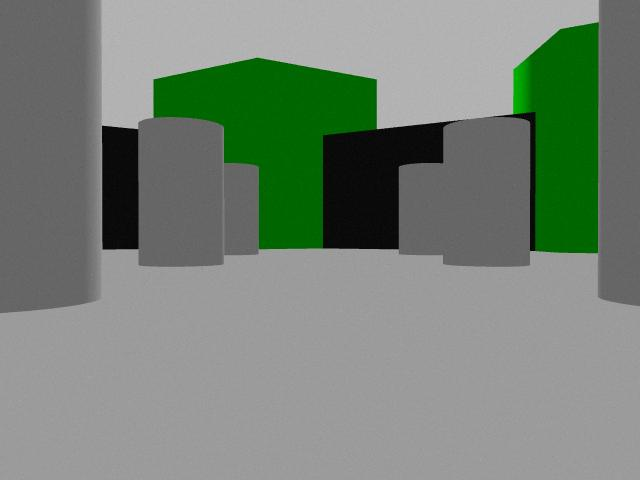

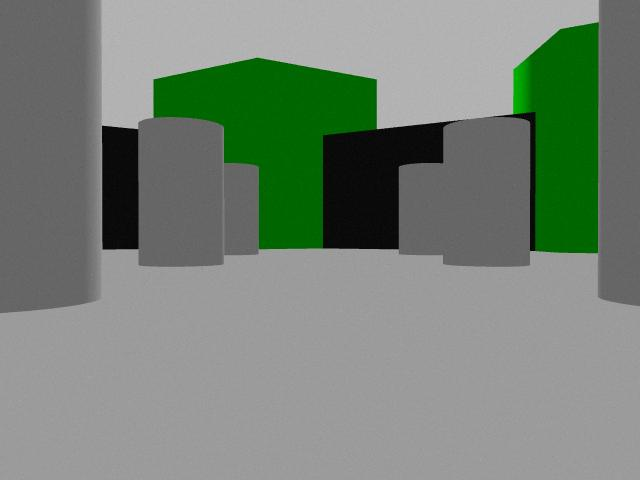

In [6]:
dh = IPython.display.display(display_id=True)
dh.display("https://image.shutterstock.com/image-vector/example-red-square-grunge-stamp-260nw-327662909.jpg")
threaded_spinner.spin_in_thread()

In [8]:
threaded_spinner.stop()
minimal_node.destroy_subscription(image_subscription)

stopped spinning in thread


True

True

[Next exercise: 7. ROS Action](7.%20ROS%20Action.ipynb)